## 检视源数据集

In [1]:
import numpy as np
import pandas as pd

In [2]:
train_df=pd.read_csv('D:/house price/input/train.csv',index_col=0,engine='python')
test_df=pd.read_csv('D:/house price/input/test.csv',index_col=0,engine='python')


## 合并数据，why?对数据进行统一化处理。。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000003BF666B080>,
      dtype=object)

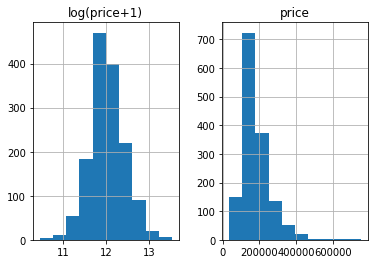

In [3]:
data=pd.concat([train_df,test_df],ignore_index=True)
%matplotlib inline
prices =pd.DataFrame({"price":train_df["SalePrice"],"log(price+1)":np.log1p(train_df["SalePrice"])})
prices.hist()

In [4]:
y_train=np.log1p(train_df.pop('SalePrice'))
all_df =pd.concat((train_df,test_df))
all_df['MSSubClass']=all_df['MSSubClass'].astype('str')

## get_dummies一键onehot编码

In [5]:
pd.get_dummies(all_df['MSSubClass'],prefix='MSSubClass').head()

,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [6]:
all_dummy_df =pd.get_dummies(all_df)

## 标准化numerical数据

In [7]:
numeric_cols =all_df.columns[all_df.dtypes !='object']

## 处理好numerical变量
## 平均值填补缺失值

In [8]:
all_dummy_df[numeric_cols]=all_dummy_df[numeric_cols].fillna(all_dummy_df[numeric_cols].mean())

In [9]:
numeric_col_means=all_dummy_df[numeric_cols].mean()
numeric_col_std=all_dummy_df.loc[:,numeric_cols].std()
all_dummy_df.loc[:,numeric_cols] =(all_dummy_df.loc[:,numeric_cols]-numeric_col_means)/numeric_col_std

# 建立模型

In [10]:
dummy_train_df =all_dummy_df.loc[train_df.index]
dummy_test_df =all_dummy_df.loc[test_df.index]

In [15]:
dummy_train_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-2.020329e-01,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.293080,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,5.017845e-01,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.293080,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-6.126943e-02,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.293080,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-4.366387e-01,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.293080,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,6.894691e-01,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.293080,-0.161040,...,0,0,0,1,0,0,0,0,1,0
6,7.363903e-01,0.500430,-0.772420,-0.507197,0.715952,0.513801,-0.572152,0.637883,-0.293080,-1.130393,...,0,0,0,1,0,0,0,0,1,0
7,2.671787e-01,-0.010665,1.355319,-0.507197,1.079091,0.992399,0.469129,2.036246,-0.293080,-0.554698,...,0,0,0,1,0,0,0,0,1,0
8,-1.800332e-14,0.027119,0.646073,0.391170,0.055700,-0.539116,0.771437,0.916678,-0.103928,-0.784521,...,0,0,0,1,0,0,0,0,1,0
9,-8.589292e-01,-0.513264,0.646073,-0.507197,-1.330831,-1.639892,-0.572152,-0.969026,-0.293080,0.890230,...,0,0,0,1,1,0,0,0,0,0


## 将DF转换为Numpy Array 格式

In [13]:
X_train =dummy_train_df.values
X_test =dummy_test_df.values

## 做一个较高级的Esemble,把n个分类器结合在一起，做一个综合的分类器以达到最好的效果
### Ridge(alpha=15)效果最好

In [13]:
from sklearn.linear_model import Ridge
ridge=Ridge(15)

## Bagging（自带decisiontree）

In [14]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score

In [22]:
params=[1,10,15,20,25,30,40]
test_scores=[]
for param in params:
    clf=BaggingRegressor(n_estimators=param,base_estimator=ridge)
    test_score =np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

0.13287296694129208

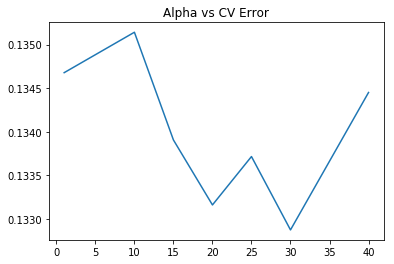

In [23]:
import matplotlib.pyplot as plt
plt.plot(params,test_scores)
plt.title("Alpha vs CV Error")
min(test_scores)

# Boosting


In [24]:
from sklearn.ensemble  import AdaBoostRegressor

In [25]:
params =[10,15,20,25,30,35,40,45,50]
test_scores=[]
for param in params:
    clf =BaggingRegressor(n_estimators=param,base_estimator=ridge)
    test_score=np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,
                                        scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

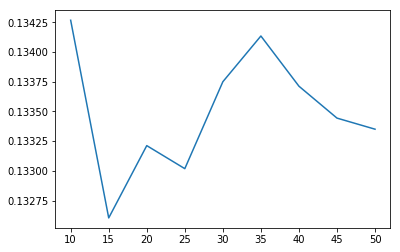

In [26]:
plt.plot(params,test_scores)

In [27]:
min(test_scores)

0.13260419974405596

## XGBoost

In [28]:
from xgboost import XGBRegressor

## 用sklearn自带的cross validation方法来测试模型

In [30]:
params=[1,2,3,4,5,6]
test_scores=[]
for param in params:
    clf=XGBRegressor(max_depth=param)
    test_score =np.sqrt(-cross_val_score(clf,X_train,y_train,cv=10,scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

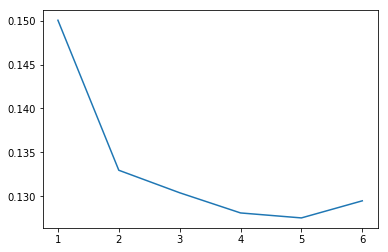

In [31]:
plt.plot(params,test_scores)

In [32]:
min(test_scores)

0.12752967909259855